In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings 
from sklearn.linear_model import LinearRegression, Ridge ,ElasticNet
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
%matplotlib inline

In [377]:
df = pd.read_csv("clean_data.csv")
df.tail(3)

,Unnamed: 0,Brand,Standing screen display size,Processor Brand,Processor Speed,RAM Size,Hard Drive Size,Hard Disk Description,Graphics Chipset Brand,Operating System,Item Weight,Price
1678,1678,HP,15.6,Intel,1.8,16,512,SSD,Intel,Windows10Pro,9.03,6411.22
1679,1679,HP,15.6,AMD,2.0,16,256,SSD,AMD,Windows10Pro,1.81,4442.91
1680,1680,HP,13.0,AMD,1.8,16,256,SSD,AMD,Windows10Pro,1.70,4842.91


In [378]:
#drop unnecassery column
df = df.drop(['Unnamed: 0'],axis=1, errors='ignore')

In [379]:
df.shape

(1681, 11)

In [380]:
df.columns

Index(['Brand', 'Standing screen display size', 'Processor Brand',
       'Processor Speed', 'RAM Size', 'Hard Drive Size',
       'Hard Disk Description', 'Graphics Chipset Brand', 'Operating System',
       'Item Weight', 'Price'],
      dtype='object')

In [381]:
corr = df.corr()
corr

,Standing screen display size,Processor Speed,RAM Size,Hard Drive Size,Item Weight,Price
Standing screen display size,1.000000,0.089059,0.097076,0.215904,0.543228,0.085620
Processor Speed,0.089059,1.000000,0.105723,0.041899,0.071590,0.214319
RAM Size,0.097076,0.105723,1.000000,0.160291,0.184736,0.577769
Hard Drive Size,0.215904,0.041899,0.160291,1.000000,0.147667,-0.013595
Item Weight,0.543228,0.071590,0.184736,0.147667,1.000000,0.179023
Price,0.085620,0.214319,0.577769,-0.013595,0.179023,1.000000


# Modeling


In [382]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import preprocessing
from sklearn.linear_model import LassoCV, RidgeCV 
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNetCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


* convert categorical data to dummy  variable

In [383]:
result=pd.get_dummies(df, columns=["Brand", "Processor Brand",'Hard Disk Description','Graphics Chipset Brand','Operating System'], prefix=["Brand", "Processor Brand",'Hard Disk Description','Graphics Chipset Brand','Operating System'])
result.head()

,Standing screen display size,Processor Speed,RAM Size,Hard Drive Size,Item Weight,Price,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Basrdis,...,Operating System_Windows,Operating System_Windows10,Operating System_Windows10Home,Operating System_Windows10Pro,Operating System_Windows10S,Operating System_Windows11,Operating System_Windows12,Operating System_Windows1o,Operating System_Windows7,Operating System_macOS
0,13.3,2.3,8,128,1.37,5827.6515,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13.3,1.8,8,128,1.34,3910.3890,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15.6,2.5,8,256,1.86,2501.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.4,2.7,16,512,1.83,11037.9075,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13.3,3.1,8,256,1.37,7845.6600,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [384]:
result.shape

(1681, 62)

In [385]:
result.corr()

,Standing screen display size,Processor Speed,RAM Size,Hard Drive Size,Item Weight,Price,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Basrdis,...,Operating System_Windows,Operating System_Windows10,Operating System_Windows10Home,Operating System_Windows10Pro,Operating System_Windows10S,Operating System_Windows11,Operating System_Windows12,Operating System_Windows1o,Operating System_Windows7,Operating System_macOS
Standing screen display size,1.000000,0.089059,0.097076,0.215904,0.543228,0.085620,0.029309,-0.134285,0.088576,-0.015807,...,0.000257,0.125401,-0.072116,-0.057173,-0.088878,-0.003689,-0.030756,-0.015807,-0.043794,-0.083810
Processor Speed,0.089059,1.000000,0.105723,0.041899,0.071590,0.214319,-0.076309,-0.052271,0.019987,-0.002108,...,-0.037052,0.005415,0.162017,0.022953,0.025427,-0.000330,-0.081823,0.018767,0.014050,-0.005138
RAM Size,0.097076,0.105723,1.000000,0.160291,0.184736,0.577769,-0.134716,-0.007899,-0.035137,-0.006228,...,-0.036189,-0.145375,0.189445,0.252291,-0.066832,0.254429,0.041755,-0.019771,-0.044382,0.000083
Hard Drive Size,0.215904,0.041899,0.160291,1.000000,0.147667,-0.013595,0.006681,-0.043834,-0.032048,0.003748,...,0.058485,-0.164236,0.148564,0.102486,-0.108660,0.063265,0.007504,0.003748,-0.053711,-0.031430
Item Weight,0.543228,0.071590,0.184736,0.147667,1.000000,0.179023,0.035972,-0.097471,0.064275,-0.015875,...,0.082910,0.025960,-0.051456,0.143241,-0.072867,-0.030589,-0.026492,-0.014408,-0.034201,-0.067817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Operating System_Windows11,-0.003689,-0.000330,0.254429,0.063265,-0.030589,-0.066818,-0.035221,-0.015668,-0.021719,-0.003399,...,-0.006803,-0.206425,-0.039654,-0.032937,-0.017116,1.000000,-0.006803,-0.003399,-0.023104,-0.012298
Operating System_Windows12,-0.030756,-0.081823,0.041755,0.007504,-0.026492,-0.008851,-0.012348,-0.005493,-0.020461,-0.001192,...,-0.002385,-0.072371,-0.013902,-0.011547,-0.006001,-0.006803,1.000000,-0.001192,-0.008100,-0.004312
Operating System_Windows1o,-0.015807,0.018767,-0.019771,0.003748,-0.014408,-0.021423,-0.006168,-0.002744,0.058234,-0.000595,...,-0.001192,-0.036153,-0.006945,-0.005769,-0.002998,-0.003399,-0.001192,1.000000,-0.004046,-0.002154
Operating System_Windows7,-0.043794,0.014050,-0.044382,-0.053711,-0.034201,0.140032,-0.041932,-0.018654,-0.069484,-0.004046,...,-0.008100,-0.245761,-0.047210,-0.039214,-0.020378,-0.023104,-0.008100,-0.004046,1.000000,-0.014642


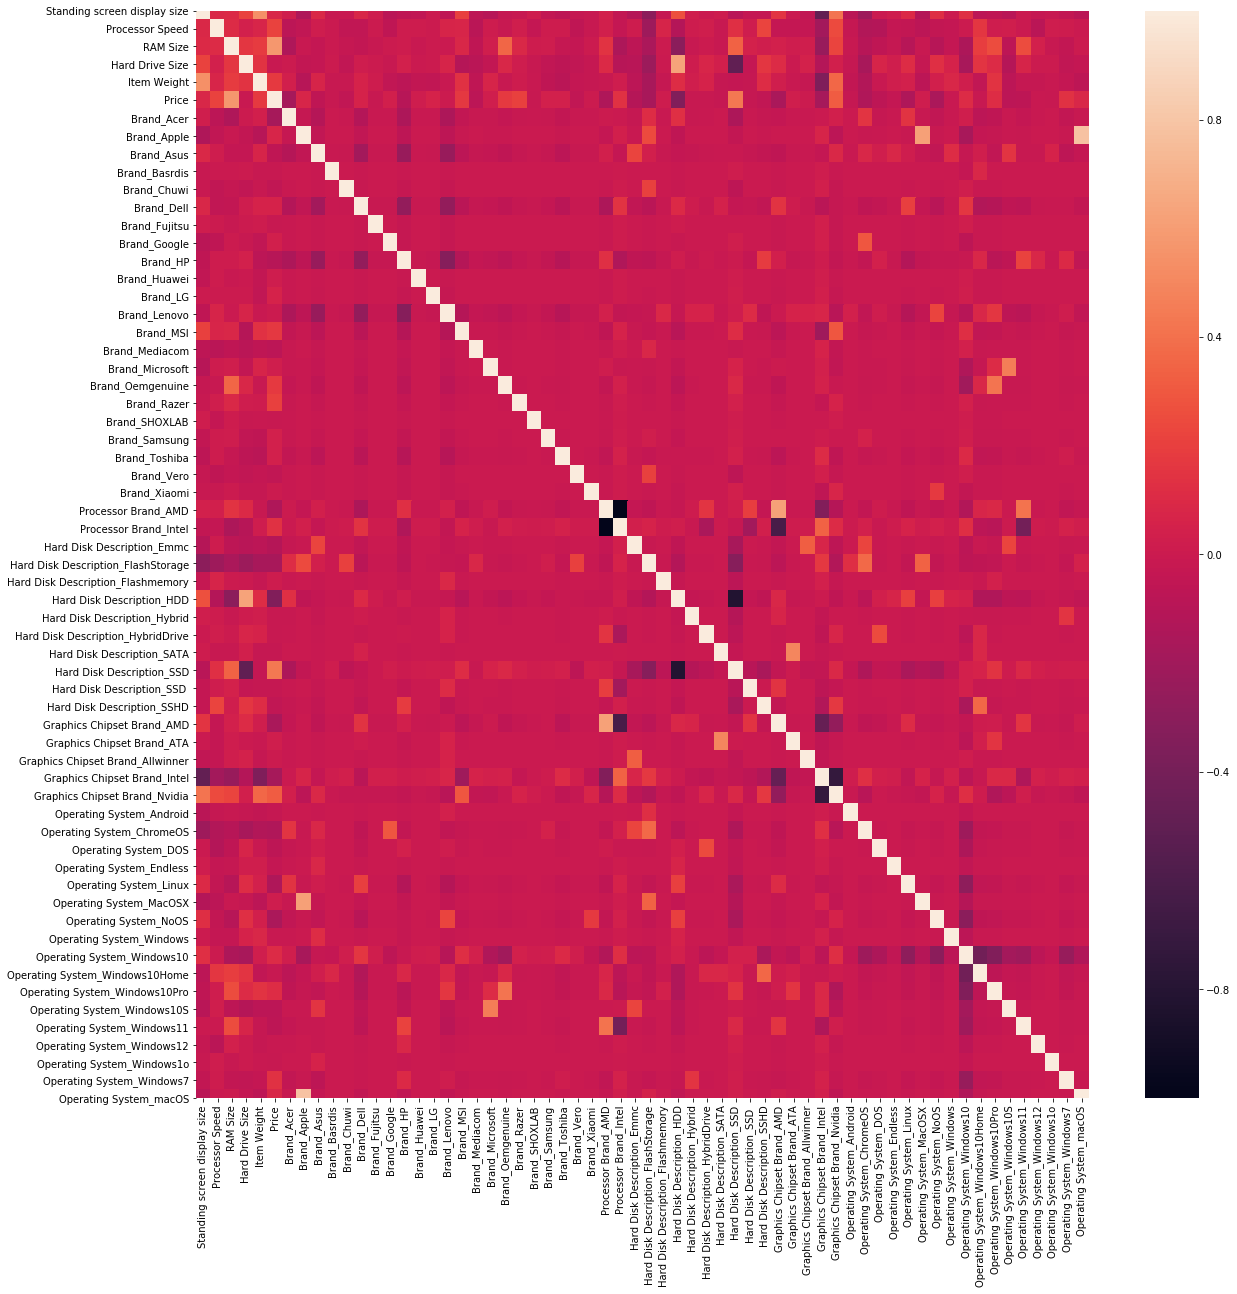

In [386]:
ax = plt.subplots(figsize=(20, 20))

sns.heatmap(result.corr());
plt.savefig('corr.png')

In [387]:
result.describe()

,Standing screen display size,Processor Speed,RAM Size,Hard Drive Size,Item Weight,Price,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Basrdis,...,Operating System_Windows,Operating System_Windows10,Operating System_Windows10Home,Operating System_Windows10Pro,Operating System_Windows10S,Operating System_Windows11,Operating System_Windows12,Operating System_Windows1o,Operating System_Windows7,Operating System_macOS
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,...,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,14.892742,2.370690,9.839381,458.572873,2.041011,4801.152541,0.060083,0.012493,0.149316,0.000595,...,0.002380,0.687091,0.074955,0.052945,0.014872,0.019036,0.002380,0.000595,0.026770,0.007733
std,1.378338,0.818381,7.207826,347.848128,0.831693,3004.202188,0.237712,0.111103,0.356506,0.024390,...,0.048737,0.463816,0.263398,0.223990,0.121077,0.136693,0.048737,0.024390,0.161458,0.087626
min,10.100000,0.900000,2.000000,8.000000,0.690000,744.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,1.800000,4.000000,256.000000,1.490000,2675.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.600000,2.500000,8.000000,256.000000,1.970000,4128.150000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.600000,2.700000,16.000000,512.000000,2.300000,6085.650000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.400000,8.000000,64.000000,2000.000000,9.060000,26530.650000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [388]:
X, y = result.drop('Price',axis=1), result['Price']
scaler = StandardScaler()
#train_size=80%   test=20
X, X_test,y,y_test=train_test_split(X,y,test_size=.20,random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)
X_train_scaled = scaler.fit_transform(X_train)

In [389]:
print("Training Data has",X_train.shape)
print('Test Data has',X_test.shape)
print("Validation Data has",X_val.shape)

Training Data has (1008, 61)
Test Data has (337, 61)
Validation Data has (336, 61)


# Model 1:Linear Regression

In [391]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
print('Train:',lr.score(X_train_scaled,y_train))


Train: 0.6456242895387745


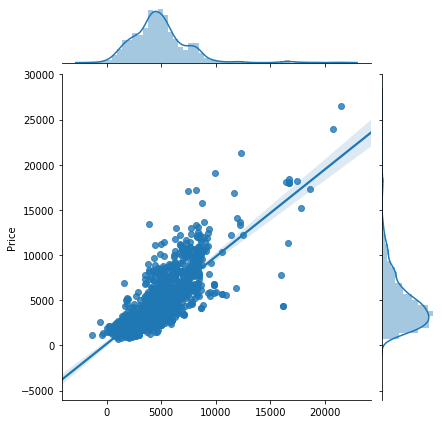

In [392]:
lr = LinearRegression() 
lr.fit(X_train, y_train) 
preds = lr.predict(X) # generate predictions (on training data) using fit model
sns.jointplot(x=preds,y=y, kind='reg')

# Model 2:Forest Regressor

In [393]:
rfg=RandomForestRegressor()
scaler = StandardScaler()
rfg.fit(X_train_scaled,y_train)
print('Training: ',rfg.score(X_train_scaled,y_train))


Training:  0.9348104105075895


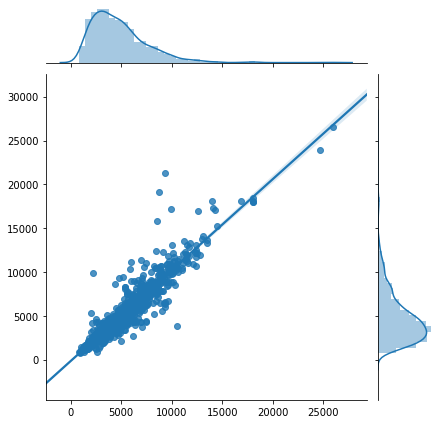

In [350]:
rfg = RandomForestRegressor() 
rfg.fit(X_train,y_train)
preds = rfg.predict(X) # generate predictions (on training data) using fit model
sns.jointplot(x=preds,y=y, kind='reg')

# Model 3 :Gradient Boosting Regressor


In [394]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
print('Training: ',gbm.score(X_train,y_train))


Training:  0.8650529601315722


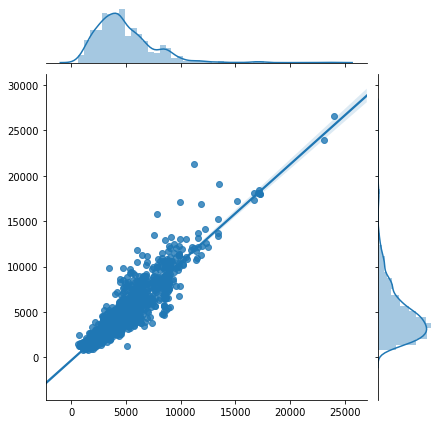

In [352]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train,y_train)
preds = gbm.predict(X) # generate predictions (on training data) using fit model
sns.jointplot(x=preds,y=y, kind='reg')

# Model 4 :Polynomial

In [395]:
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train)
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_train_poly , y_train):.3f}')


Degree 2 polynomial regression val R^2: 0.865


AttributeError: 'PolynomialFeatures' object has no attribute 'predict'

# Ordinary least squares(OLS)

In [303]:
# fit model with target as laptops price index
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     31.63
Date:                Sat, 23 Oct 2021   Prob (F-statistic):          1.23e-176
Time:                        19:22:00   Log-Likelihood:                -9002.0
No. Observations:                1008   AIC:                         1.812e+04
Df Residuals:                     952   BIC:                         1.839e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Standing screen display size           9.1862     64.048      0.143      0.886    -116.505     134.877
Processor Speed                      326.1311     80.680      4.042      0.000     167.799     484.463
RAM Size                             205.5498     12.131     16.944      0.000     181.743     229.356
Hard Drive Size                        1.5012      0.282      5.321      0.000       0.948       2.055
Item Weight                          252.5084     97.589      2.587      0.010      60.994     444.022
Brand_Acer                         -1338.9801    330.460     -4.052      0.000   -1987.495    -690.465
Brand_Apple                         1821.4633    445.372      4.090      0.000     947.440    2695.487
Brand_Asus                          -780.6752    279.387     -2.794      0.005   -1328.960    -232.390
Brand_Basrdis                      -1294.7832   1829.772     -0.708      0.479   -4885.635    2296.069
Brand_Chuwi                        -2486.5964   1351.312     -1.840      0.066   -5138.490     165.297
Brand_Dell                          -142.2510    275.804     -0.516      0.606    -683.505     399.003
Brand_Fujitsu                      -2088.8192   1816.940     -1.150      0.251   -5654.490    1476.851
Brand_Google                        2877.0114   1170.127      2.459      0.014     580.684    5173.338
Brand_HP                            -971.3198    260.830     -3.724      0.000   -1483.188    -459.451
Brand_Huawei                         719.4281   1294.836      0.556      0.579   -1821.634    3260.490
Brand_LG                            2162.2224   1300.042      1.663      0.097    -389.057    4713.502
Brand_Lenovo                        -429.4808    257.708     -1.667      0.096    -935.221      76.260
Brand_MSI                            107.3963    390.147      0.275      0.783    -658.251     873.043
Brand_Mediacom                     -2233.8789    778.441     -2.870      0.004   -3761.538    -706.220
Brand_Microsoft                      530.2993    841.922      0.630      0.529   -1121.937    2182.536
Brand_Oemgenuine                    -428.2418    542.162     -0.790      0.430   -1492.213     635.729
Brand_Razer                         8618.1569   1079.915      7.980      0.000    6498.868    1.07e+04
Brand_SHOXLAB                      -3301.9465   1296.906     -2.546      0.011   -5847.072    -756.821
Brand_Samsung                        162.3108   1068.789      0.152      0.879   -1935.144    2259.765
Brand_Toshiba                        180.6827    420.339      0.430      0.667    -644.215    1005.580
Brand_Vero                         -2058.8864   1848.842     -1.114      0.266   -5687.164    1569.391
Brand_Xiaomi                        -423.3763   1090.227     -0.388      0.698   -2562.902    17

# cross validation

In [396]:
from sklearn.model_selection import KFold
X,y =result.drop('Price',axis=1),result['Price']
X,X_test ,y,y_test=train_test_split(X,y,test_size=.2,random_state=10)
X,y=np.array(X),np.array(y)

In [397]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_forest ,cv_lm_poly,cv_lm_Gradient= [], [] ,[],[] #collect the validation results for both models
poly = PolynomialFeatures(degree=2)
for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_forest =RandomForestRegressor()
    poly = PolynomialFeatures(degree=2) 
    lm_gbm = GradientBoostingRegressor(n_estimators=500, max_depth=3, learning_rate=.01)

    scaler = StandardScaler()
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
  

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    
    lm_forest.fit(X_train_scaled, y_train)
    cv_lm_forest.append(lm_forest.score(X_val_scaled, y_val))
    
    lm_gbm.fit(X_train_scaled, y_train)
    cv_lm_Gradient.append(lm_gbm.score(X_val_scaled, y_val))
    
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly.append( lm_poly.score(X_val_poly, y_val))
    


print('Simple regression scores: ', cv_lm_r2s)
print('Random forest scores: ', cv_lm_forest, '\n')
print('Gradient Boosting scores: ', cv_lm_Gradient, '\n')
print('poly scores: ', cv_lm_poly, '\n')


print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Random Forest mean cv r^2: {np.mean(cv_lm_forest):.3f} +- {np.std(cv_lm_forest):.3f}')
print(f'Gradient Boosting cv r^2: {np.mean(cv_lm_Gradient):.3f} +- {np.std(cv_lm_Gradient):.3f}')
print(f'poly mean cv r^2: {np.mean(cv_lm_poly):.3f} +- {np.std(cv_lm_poly):.3f}')




Simple regression scores:  [0.6273977557624792, 0.6009044834785231, 0.6456481960062999, 0.5558791924333811, 0.48237761666762624]
Random forest scores:  [0.7082999692615266, 0.6720234081193915, 0.7968567928506454, 0.7586522424118595, 0.758889638397592] 

Gradient Boosting scores:  [0.7049048110910598, 0.6995846145044219, 0.7768613895163211, 0.6748243934126006, 0.68894032014462] 

poly scores:  [-3144979.22574246, -194073164922.71817, -31854804852422.58, -47886468299240.2, -52284826704060.945] 

Simple mean cv r^2: 0.582 +- 0.058
Random Forest mean cv r^2: 0.739 +- 0.044
Gradient Boosting cv r^2: 0.709 +- 0.035
poly mean cv r^2: -26444035233125.133 +- 22561685261404.043


* feature_engineering_regression

In [398]:
#remove columns that have high p in see the affect 
X= result[['Standing screen display size','Processor Speed','Operating System_Windows','RAM Size','Hard Drive Size', 'Item Weight','Brand_Acer','Brand_Apple',
          'Brand_Asus','Brand_Basrdis','Brand_Chuwi','Brand_Fujitsu','Brand_Google','Brand_HP','Brand_LG','Brand_Lenovo','Brand_Mediacom','Brand_Oemgenuine','Brand_Razer',
          'Brand_SHOXLAB','Brand_Vero','Operating System_NoOS','Processor Brand_AMD','Hard Disk Description_Emmc','Hard Disk Description_FlashStorage','Hard Disk Description_HDD',
          'Hard Disk Description_Hybrid','Hard Disk Description_SSD','Graphics Chipset Brand_Allwinner','Graphics Chipset Brand_Intel','Hard Disk Description_SSHD','Operating System_macOS','Hard Disk Description_SATA','Operating System_Windows1o','Operating System_Windows11',
           'Graphics Chipset Brand_ATA','Operating System_DOS','Graphics Chipset Brand_Nvidia','Operating System_Windows10Pro','Graphics Chipset Brand_Intel','Graphics Chipset Brand_Intel','Operating System_Windows7']]

y = result['Price']


X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)





In [399]:
gbm = GradientBoostingRegressor()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)

gbm.fit(X_train_scaled, y_train)
gbm.score(X_train_scaled, y_train)


0.8615547152275649

In [400]:
gbm.score(X_val_scaled, y_val)

0.7100845323005738

In [403]:
rfg=RandomForestRegressor()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)

rfg.fit(X_train_scaled, y_train)
rfg.score(X_train_scaled, y_train)

0.9497595547519148

In [404]:
rfg.score(X_val_scaled, y_val)

0.7305526062376944

In [405]:
def build_grid_search_est(model, X, y, cv=5, **params):

    grid_est = GridSearchCV(model, param_grid=params, cv=cv, 
                            return_train_score=False)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
#       plt.plot(np.log(df.alpha), df.mean_test_score);
#   plt.semilogx(df.alpha, df.mean_test_score)
    return grid_est

In [406]:
lasso_grid_est = build_grid_search_est(Lasso(), X_train, y_train, cv=5,alpha=np.logspace(-4, -1, 30))

In [407]:
from sklearn.linear_model import LinearRegression, Ridge ,ElasticNet
ridge_grid_est = build_grid_search_est(Ridge(), X_train, y_train, cv=5,alpha=np.logspace(-4, -1, 10))

In [408]:
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_train, y_train, cv=5,alpha=np.logspace(-4, 0.1, 30),l1_ratio=np.linspace(0,1,30,endpoint=False))

In [409]:
lasso_grid_est.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [410]:
ridge_grid_est.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [411]:
elastic_net_grid_est.best_estimator_

ElasticNet(alpha=0.0009764616075829727, copy_X=True, fit_intercept=True,
           l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [412]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled,y_train)
print(lasso.score(X_train_scaled,y_train))
print(lasso.score(X_val_scaled,y_val))

0.6264609270673241
0.5341887744506466


In [413]:
ElasticNet=ElasticNet(alpha=0.0009764616075829727)
ElasticNet.fit(X_train_scaled,y_train)
print(ElasticNet.score(X_train_scaled,y_train))
print(ElasticNet.score(X_val_scaled,y_val))

0.6264602046190078
0.5343333396632237


In [414]:
Ridge = Ridge(alpha=0.1)
Ridge.fit(X_train_scaled,y_train)
print(Ridge.score(X_train_scaled,y_train))
print(Ridge.score(X_val_scaled,y_val))

0.6264609833140717
0.5341996117986709


* Retrain model on full dataset

# Test

In [415]:
all_x_data = pd.concat([X_train, X_val], axis=0, copy=True)
all_x_data.head()

,Standing screen display size,Processor Speed,Operating System_Windows,RAM Size,Hard Drive Size,Item Weight,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Basrdis,...,Hard Disk Description_SATA,Operating System_Windows1o,Operating System_Windows11,Graphics Chipset Brand_ATA,Operating System_DOS,Graphics Chipset Brand_Nvidia,Operating System_Windows10Pro,Graphics Chipset Brand_Intel,Graphics Chipset Brand_Intel,Operating System_Windows7
624,15.6,2.3,0,4,500,1.88,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
167,15.6,2.8,0,8,128,2.56,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1304,14.0,3.0,0,4,512,1.40,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1523,13.5,4.0,0,8,1000,2.98,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
848,15.6,1.6,0,4,128,1.86,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [416]:
all_y_data = pd.concat([y_train, y_val], axis=0, copy=True)
all_y_data.head()

624     4054.2000
167     4613.1315
1304    2276.3400
1523    2250.1500
848     1300.6500
Name: Price, dtype: float64

In [417]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge ,ElasticNet



lasso = Lasso(alpha=0.1)
lasso.fit(all_x_data, all_y_data)
y_pred = lasso_grid_est.predict(X_test)
print("Lasso Regression:", r2_score(y_test, y_pred))

Ridge = Ridge(alpha=0.1)
Ridge.fit(all_x_data, all_y_data)
y_pred = ridge_grid_est.predict(X_test)
print("Ridge Regression:", r2_score(y_test, y_pred))

ElasticNet=ElasticNet(alpha=0.0009764616075829727)
ElasticNet.fit(all_x_data, all_y_data)
y_pred = elastic_net_grid_est.predict(X_test)
print("ElasticNet Regression:", r2_score(y_test, y_pred))


gbm = GradientBoostingRegressor()
gbm.fit(all_x_data, all_y_data)
y_pred = gbm.predict(X_test)
print("Gradient Boosted Regression:", r2_score(y_test, y_pred))

rfg=RandomForestRegressor()
rfg.fit(all_x_data, all_y_data)
y_pred = rfg.predict(X_test)
print("Random Forest Regression:", r2_score(y_test, y_pred))

Lasso Regression: 0.5427019045917065
Ridge Regression: 0.5450995512496762
ElasticNet Regression: 0.5585138180400719
Gradient Boosted Regression: 0.8037862320263938
Random Forest Regression: 0.808769482201242


# Save Model

In [418]:
import pickle

In [95]:
data = pd.concat([X_test, y_test], axis=1, copy=True)


In [96]:
with open('Model.pickle', 'wb') as to_write:
    pickle.dump(data, to_write)